In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2
%matplotlib ipympl

import sys 
from os import path as pt
import numpy as np
import matplotlib.pyplot as plt
import ot
from tqdm import tqdm
import random
from utils import Lmatrix2paths, adapted_empirical_measure, adapted_wasserstein_squared, quantization, nested, plot_V

np.random.seed(0)
random.seed(0)
verbose = True

# Markovian Gaussian Process

mu
Cholesky:
[[1 0 0]
 [1 2 0]
 [2 4 2]]
Covariance:
[[ 1  1  2]
 [ 1  5 10]
 [ 2 10 24]]
nu
Cholesky:
[[1 0 0]
 [2 1 0]
 [2 1 2]]
Covariance:
[[1 2 2]
 [2 5 5]
 [2 5 9]]


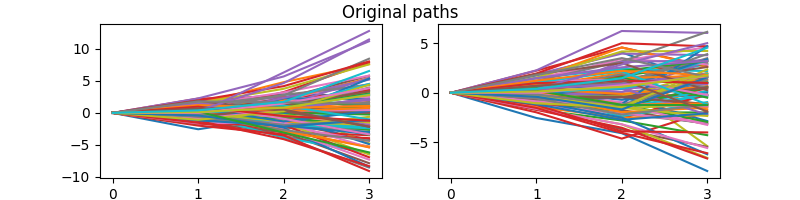

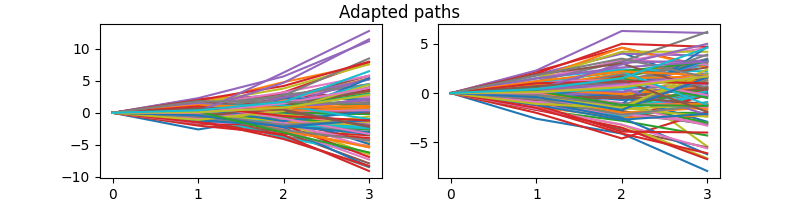

In [2]:
# Markovian
n_sample = 1000
normalize = False

print("mu")
L = np.array([[1, 0, 0], [1, 2, 0], [2, 4, 2]])
X,A = Lmatrix2paths(L, n_sample, seed = 0)

print("nu")
M = np.array([[1, 0, 0], [2, 1, 0], [2, 1, 2]])
Y,B = Lmatrix2paths(M, n_sample, seed = 0)

if verbose:
    fig, ax = plt.subplots(1, 2, figsize=[8, 2])
    ax[0].plot(X[:,:100])
    ax[1].plot(Y[:,:100])
    plt.suptitle('Original paths')
    plt.show()

# Grid projection of k-mean projection
adaptedX = adapted_empirical_measure(X, delta_n = 0.1)
adaptedY = adapted_empirical_measure(Y, delta_n = 0.1)

if verbose:
    fig, ax = plt.subplots(1,2, figsize=[8, 2])
    ax[0].plot(adaptedX[:,:100])
    ax[1].plot(adaptedY[:,:100])
    plt.suptitle('Adapted paths')
    plt.show()

# Markovian Nested Solver

In [3]:
q2v, v2q, mu_x, nu_y, q2v_x, v2q_x, q2v_y, v2q_y = quantization(adaptedX, adaptedY, markovian=True)
AW_2square, V = nested(mu_x, nu_y, v2q_x, v2q_y, q2v, markovian=True)
dist_bench = adapted_wasserstein_squared(A, B)
print("Theoretical AW_2^2: ", dist_bench)
print("Numerical AW_2^2: ", AW_2square)

Quantization ......
Number of distinct values in global quantization:  211
Number of condition subpaths of mu_x
Time 0: 1
Time 1: 57
Time 2: 110
Number of condition subpaths of nu_y
Time 0: 1
Time 1: 57
Time 2: 116
Nested backward induction .......


Timestep 0: 100%|██████████| 1/1 [00:00<00:00, 737.91it/s]

Theoretical AW_2^2:  11.0
Numerical AW_2^2:  10.910538174273363


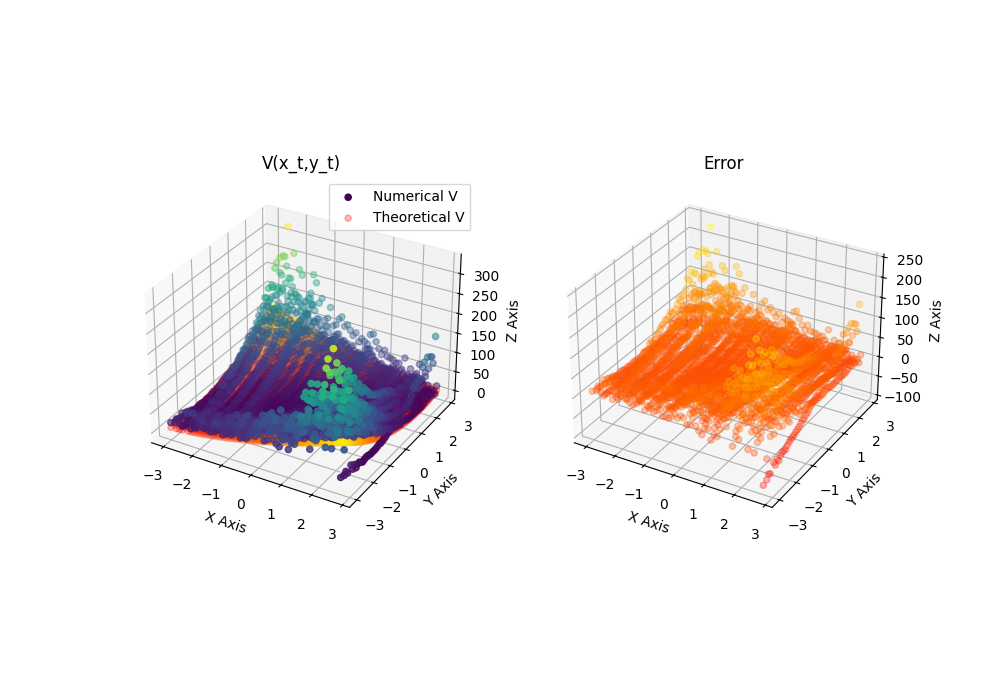

In [4]:
fig, ax = plot_V(q2v, q2v_x, q2v_y, V, t = 1, markovian=True, L = L, M = M)


# Non-Markovian Nested Solver

In [7]:
q2v, v2q, mu_x, nu_y, q2v_x, v2q_x, q2v_y, v2q_y = quantization(adaptedX, adaptedY, markovian=False)
AW_2square, V = nested(mu_x, nu_y, v2q_x, v2q_y, q2v, markovian=False)
dist_bench = adapted_wasserstein_squared(A, B)
print("Theoretical AW_2^2: ", dist_bench)
print("Numerical AW_2^2: ", AW_2square)

Quantization ......
Number of distinct values in global quantization:  211
Number of condition subpaths of mu_x
Time 0: 1
Time 1: 57
Time 2: 820
Number of condition subpaths of nu_y
Time 0: 1
Time 1: 57
Time 2: 692
Nested backward induction .......


Timestep 0: 100%|██████████| 1/1 [00:00<00:00, 536.42it/s]

Theoretical AW_2^2:  11.0
Numerical AW_2^2:  10.222063592415157


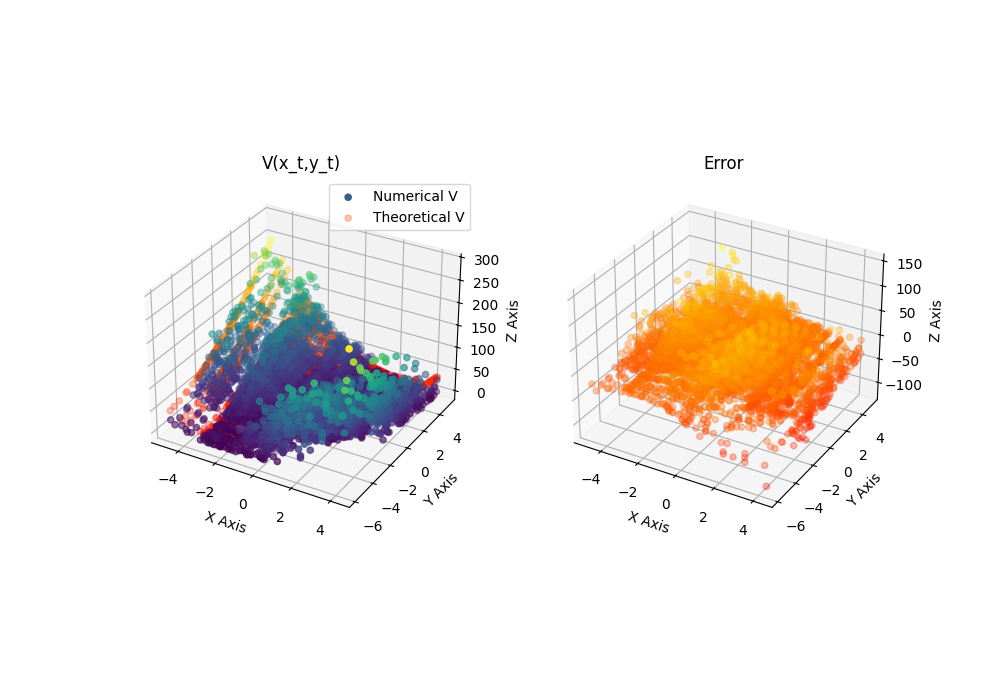

In [8]:
fig, ax = plot_V(q2v, q2v_x, q2v_y, V, t = 2, markovian=False, L = L, M = M)